<a href="https://colab.research.google.com/github/natreis02/NLP-Text-Classification/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# TensorFlow code course. Taken from: https://youtu.be/ZMudJXhsUpY?si=KvGAVHrKF9NAo8En

In [15]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [16]:
# Arquivo de texto contendo letras irlandesas
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2024-10-22 18:31:24--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.207, 142.250.157.207, 142.251.8.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.1s    

2024-10-22 18:31:25 (454 KB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [17]:
tokenizer = Tokenizer() # Este objeto converte palavras em números.

data = open('/tmp/irish-lyrics-eof.txt').read() # Ler dataset

corpus = data.lower().split("\n") # Aqui, há a conversão de todo o texto para minúsculas usando 'lower()' e dividindo o texto em linhas: 'split("\n").

tokenizer.fit_on_texts(corpus) # Faz o trabalho de tokenização (criação do dicionário).
total_words = len(tokenizer.word_index) + 1 # calcula o número total de palavras únicas no dicionário de tokenização, adicionando 1 para incluir um índice reservado (geralmente para preenchimento ou representação de palavras desconhecidas).

print(tokenizer.word_index)
print(total_words)

#Obs.: Na criação do dicionário, frequentemente, palavras mais comuns recebem índices mais baixos. O índice 0 é reservado para o padding.

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [18]:
input_sequences = [] # Cria listas vazias que serão preenchidas.
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0] # Para cada linhas, cria uma lista de tokens.
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1] # utilizado para gerar os X's (entradas)

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) # utilizado para gerar os Y's (saídas). Como a saída é categórica, utilizar o one hot.

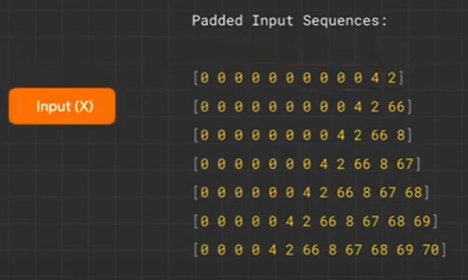

Uma breve contextualização para os vetores de entrada. São adicionados paddings para que as frases possuam o mesmo tamanho. No entanto, a ideia é utilizar um token e treinar pra prever a palavra mais próxima. Em seguinda, as duas palavras mais próximas, depois, as três palavras mais próximas, e assim por diante. O último valor da sequência, no caso: 2, 66, 8, 67, 68, 69 e 70, são os rótulos para cada sequência.

In [19]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [20]:
print(xs[6])
print(ys[6])
print(xs[5])
print(ys[5])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]
[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [21]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [22]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 38s 89ms/step - accuracy: 0.0702 - loss: 6.7943
Epoch 2/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 48s 107ms/step - accuracy: 0.1053 - loss: 5.7492
Epoch 3/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.1779 - loss: 4.7404
Epoch 4/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 32s 85ms/step - accuracy: 0.2543 - loss: 3.9413
Epoch 5/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 39s 79ms/step - accuracy: 0.2806 - loss: 3.8229
Epoch 6/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 42s 82ms/step - accuracy: 0.4287 - loss: 2.5771
Epoch 7/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 44s 89ms/step - accuracy: 0.5394 - loss: 1.9909
Epoch 8/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - accuracy: 0.6038 - loss: 1.6663
Epoch 9/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - accuracy: 0.6729 - loss: 1.3821
Epoch 10/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 42s 83ms/step - accuracy: 0.7056 - loss: 1.2233
Epoch 11/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.7321 - loss: 1.1177
Epoch 12/100
377/3

In [23]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

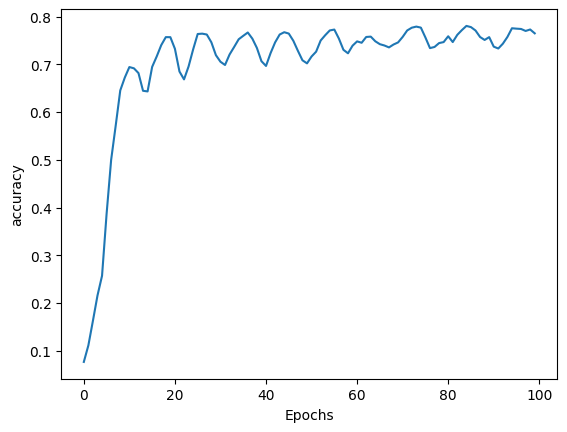

In [24]:
plot_graphs(history, 'accuracy')

In [25]:
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━